In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [465]:
patients = pd.read_csv("PatientInfo.csv")

### patients
Epidemiological data of COVID-19 patients in South Korea

1. **patient_id**: the ID of the patient
2. **global_num**: the number given by KCDC
3. **sex**: the sex of the patient
4. **birth_year**: the birth year of the patient
5. **age**: the age of the patient
6. **country**: the country of the patient
7. **province**: the province of the patient
8. **city**: the city of the patient
9. **disease**: TRUE: underlying disease / FALSE: no disease
10. **infection_case**: the case of infection
11. **infection_order**: the order of infection
12. **infected_by**: the ID of who infected the patient
13. **contact_number**: the number of contacts with people
14. **symptom_onset_date**: the date of symptom onset
15. **confirmed_date**: the date of being confirmed
16. **released_date**: the date of being released
17. **deceased_date**: the date of being deceased
18. **state**: isolated (being isolated in the hospital) / released (being released from the hospital) / deceased

In [466]:
patients

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,7000000005,9120.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,20.0,NaN,2020-03-24,NaN,NaN,isolated
2767,7000000006,9087.0,male,NaN,30s,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,NaN,NaN,isolated
2768,7000000007,NaN,female,1996.0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,NaN,NaN,isolated
2769,7000000008,NaN,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated


**patient_id**, **global_num**, **infection_order**, **infected_by**, **released_date**, **deceased_date** won't give us insight on whether the patient is released, isolated, or deceased, so I'll remove those columns. I'll also remove **country** because location is given by province/city.

In [467]:
patients = patients.drop(columns=['patient_id', 'global_num', 'infection_order', 'infected_by', 'released_date', 
                                  'deceased_date', 'country'])

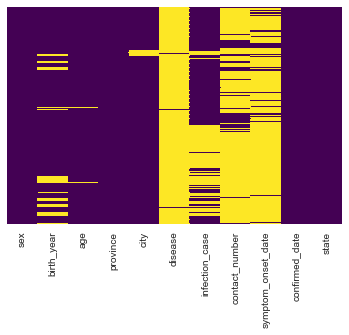

In [468]:
# check for missing data
sns.heatmap(patients.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [219]:
patients.isnull().sum()

sex                      6
birth_year             357
age                     13
province                 0
city                    68
disease               2752
infection_case         928
contact_number        2254
symptom_onset_date    2382
confirmed_date           0
state                    0
dtype: int64

**infection_case**, **contact_number**, **symptom_onset_date** have way too much null data, so I'll drop those columns as well. Factors like a patient's sex, age, location, and confirmed date are probably more indicative of a patient's state anyway. **disease** would be a really telling factor for determining the state of a patient, but there's way too much missing data in that column as well, so I'll drop it. I'll also remove **city** because we can use **province** as the factor for location.

In [469]:
patients = patients.drop(columns=['infection_case', 'contact_number', 'symptom_onset_date', 'disease', 'city'])

There is a good amount of missing data for **birth_year**, but significantly less for **age**.

In [470]:
patients[patients["age"].isnull()]

,sex,birth_year,age,province,confirmed_date,state
1287,female,NaN,NaN,Gangwon-do,2020-02-22,released
1288,male,NaN,NaN,Gangwon-do,2020-02-22,released
2240,male,NaN,NaN,Gyeongsangbuk-do,2020-02-22,isolated
2241,male,NaN,NaN,Gyeongsangbuk-do,2020-02-22,isolated
2242,female,NaN,NaN,Gyeongsangbuk-do,2020-02-24,isolated
2243,female,NaN,NaN,Gyeongsangbuk-do,2020-02-26,isolated
2244,male,NaN,NaN,Gyeongsangbuk-do,2020-02-28,isolated
2245,female,NaN,NaN,Gyeongsangbuk-do,2020-03-03,isolated
2431,female,NaN,NaN,Gyeongsangbuk-do,2020-02-29,released
2432,NaN,NaN,NaN,Gyeongsangbuk-do,2020-02-29,released


Since all the rows that have null ages also have null birth years, we can't fill in this column with precise data. I'll drop the **birth_year** column (since we can use **age** that has the age range by tens, and such precise ages that we could get from **birth_year** is probably not so important of a factor).

In [471]:
patients = patients.drop(columns=['birth_year'])

Since the proportion of **age** missing is so small, I'll replace the rows that have null data for **age** with the mean of the column.

In [472]:
patients['age']= patients.age.str.replace("s", "")

In [473]:
patients['age'] = patients['age'].astype('float')

In [474]:
patients.describe()

,age
count,2758.000000
mean,41.126178
std,20.183939
min,0.000000
25%,20.000000
50%,40.000000
75%,50.000000
max,100.000000


The mean age is 41.126178, so I'll replace all of the missing values for **age** with 40.

In [475]:
patients['age'].fillna(40.0, inplace = True) 

Since the proportion of **sex** missing is so small, I'll replace the rows that have null data for **sex** with the mode of the column.

In [476]:
patients['sex'].describe()

count       2765
unique         2
top       female
freq        1547
Name: sex, dtype: object

In [477]:
patients['sex'].fillna('female', inplace=True)

In [478]:
patients.isnull().sum()

sex               0
age               0
province          0
confirmed_date    0
state             0
dtype: int64

In [479]:
# 0 = released, 1 = isolated, 2 = deceased
state = []
for elem in patients['state']:
    if elem == 'released':
        state.append("0")
    elif elem == 'isolated':
        state.append("1")
    else:
        state.append("2")

patients['state'] = state

In [252]:
patients

,sex,age,province,confirmed_date,state
0,male,50.0,Seoul,2020-01-23,0
1,male,30.0,Seoul,2020-01-30,0
2,male,50.0,Seoul,2020-01-30,0
3,male,20.0,Seoul,2020-01-30,0
4,female,20.0,Seoul,2020-01-31,0
...,...,...,...,...,...
2766,female,20.0,Jeju-do,2020-03-24,1
2767,male,30.0,Jeju-do,2020-03-24,1
2768,female,20.0,Jeju-do,2020-03-25,1
2769,female,10.0,Jeju-do,2020-03-27,1


The features we're going to work with are **sex**, **age**, **province** (location), and **confirmed date** (gives insight on the time around which the patient contracted the virus, and therefore, how long it has been since). We'll use these features to predict a patient's state, which could help someone determine how severe their condition is. Released might indicate that the patient is healthy or has mild symptoms and can go home. Isolated might indicate that the patient's condition is more severe and needs to be isolated and treated in the hospital. Deceased might indicate that the patient's condition was extremely severe.

### Data

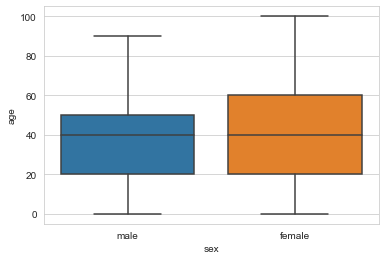

In [490]:
sns.boxplot(x='sex',y='age',data=patients)

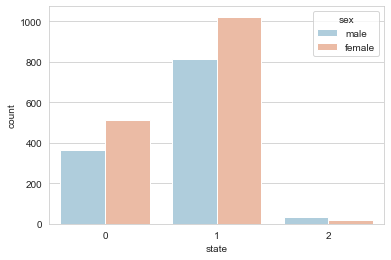

In [491]:
sns.set_style('whitegrid')
sns.countplot(x='state', hue='sex', data=patients, palette='RdBu_r')

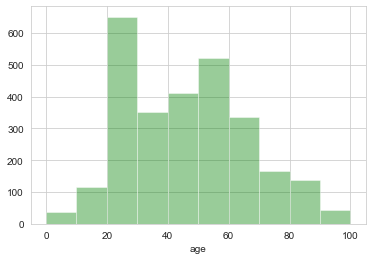

In [494]:
sns.distplot(patients['age'].dropna(), kde=False, bins=10, color='Green')

[Text(0, 0, 'Seoul'),
 Text(0, 0, 'Busan'),
 Text(0, 0, 'Daegu'),
 Text(0, 0, 'Gwangju'),
 Text(0, 0, 'Incheon'),
 Text(0, 0, 'Daejeon'),
 Text(0, 0, 'Ulsan'),
 Text(0, 0, 'Sejong'),
 Text(0, 0, 'Gyeonggi-do'),
 Text(0, 0, 'Gangwon-do'),
 Text(0, 0, 'Chungcheongbuk-do'),
 Text(0, 0, 'Chungcheongnam-do'),
 Text(0, 0, 'Jeollabuk-do'),
 Text(0, 0, 'Jeollanam-do'),
 Text(0, 0, 'Gyeongsangbuk-do'),
 Text(0, 0, 'Gyeongsangnam-do'),
 Text(0, 0, 'Jeju-do')]

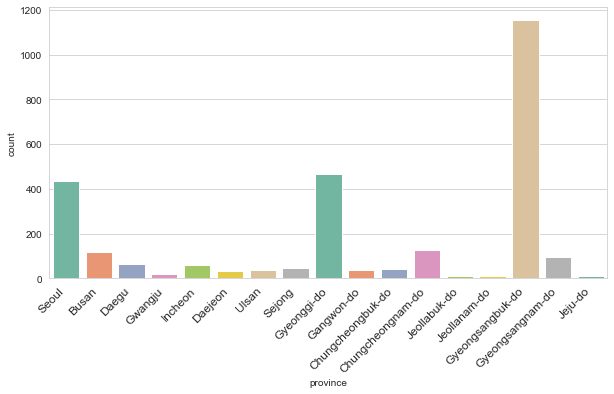

In [528]:
plt.figure(figsize=(10,5))
chart = sns.countplot(data=patients.dropna(), x='province', palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='large')

[Text(0, 0, '2020-01-23'),
 Text(0, 0, '2020-01-30'),
 Text(0, 0, '2020-01-31'),
 Text(0, 0, '2020-02-02'),
 Text(0, 0, '2020-02-05'),
 Text(0, 0, '2020-02-06'),
 Text(0, 0, '2020-02-07'),
 Text(0, 0, '2020-02-16'),
 Text(0, 0, '2020-02-19'),
 Text(0, 0, '2020-02-20'),
 Text(0, 0, '2020-02-21'),
 Text(0, 0, '2020-02-22'),
 Text(0, 0, '2020-02-23'),
 Text(0, 0, '2020-02-26'),
 Text(0, 0, '2020-02-24'),
 Text(0, 0, '2020-02-25'),
 Text(0, 0, '2020-02-27'),
 Text(0, 0, '2020-02-28'),
 Text(0, 0, '2020-02-29'),
 Text(0, 0, '2020-03-01'),
 Text(0, 0, '2020-03-02'),
 Text(0, 0, '2020-03-04'),
 Text(0, 0, '2020-03-05'),
 Text(0, 0, '2020-03-06'),
 Text(0, 0, '2020-03-07'),
 Text(0, 0, '2020-03-08'),
 Text(0, 0, '2020-03-09'),
 Text(0, 0, '2020-03-10'),
 Text(0, 0, '2020-03-11'),
 Text(0, 0, '2020-03-12'),
 Text(0, 0, '2020-03-13'),
 Text(0, 0, '2020-03-14'),
 Text(0, 0, '2020-03-15'),
 Text(0, 0, '2020-03-16'),
 Text(0, 0, '2020-03-17'),
 Text(0, 0, '2020-03-18'),
 Text(0, 0, '2020-03-19'),
 

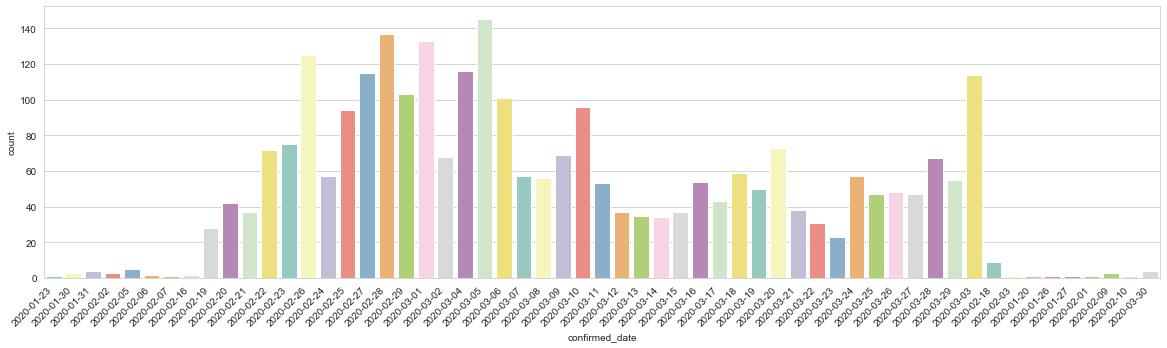

In [529]:
plt.figure(figsize=(20,5))
chart1 = sns.countplot(data=patients.dropna(), x='confirmed_date', palette='Set3')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')

### Naive Bayes

In [590]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [591]:
def label_encode(patients, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(patients[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(patients[col].values)
        col_values_transformed = le.transform(col_values)
        patients[col] = col_values_transformed

In [592]:
X = patients[['sex','age','province','confirmed_date']]
label_encode(X, X.columns.values)

y = patients[['state']]
label_encode(y, y.columns.values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [593]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [594]:
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_pred = nb.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,

In [595]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7169398907103826


In [596]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [597]:
model.fit(X, y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [598]:
kf = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_val_score(model, X, y.values.ravel(), cv=kf)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.67266187 0.89891697 0.72924188 0.64259928 0.88447653 0.51263538
 0.36101083 0.68953069 0.50541516 0.53429603]


In [599]:
print(scores.mean())

0.6430784614185908


In [600]:
pred = cross_val_predict(model, X, y.values.ravel(), cv=kf)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [601]:
with np.printoptions(threshold=np.inf):
    print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

### kNN

In [603]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [604]:
y_pred_class = knn_model.predict(X_test)
y_pred_class

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [605]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7781420765027323


In [606]:
knn_model.fit(X, y.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [607]:
kf = KFold(n_splits=10, random_state=1, shuffle=False)
scores = cross_val_score(knn_model, X, y.values.ravel(), cv=kf)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.61151079 0.90252708 0.72924188 0.66787004 0.88447653 0.58483755
 0.37184116 0.68231047 0.58122744 0.52707581]


In [608]:
print(scores.mean())

0.6542918733605174


In [609]:
pred = cross_val_predict(knn_model, X, y.values.ravel(), cv=kf)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [610]:
with np.printoptions(threshold=np.inf):
    print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0
 2 0 0 0 2 0 0 0 0 0 0 0 